# import modules

In [1]:
import numpy as np
import statistics as sp
import pandas as pd

## matplotlib, seaborn

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# import dataframe

In [2]:
dataframe = pd.read_csv('video_games.csv')

In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Title                          1212 non-null   object 
 1   Features.Handheld?             1212 non-null   bool   
 2   Features.Max Players           1212 non-null   int64  
 3   Features.Multiplatform?        1212 non-null   bool   
 4   Features.Online?               1212 non-null   bool   
 5   Metadata.Genres                1212 non-null   object 
 6   Metadata.Licensed?             1212 non-null   bool   
 7   Metadata.Publishers            948 non-null    object 
 8   Metadata.Sequel?               1212 non-null   bool   
 9   Metrics.Review Score           1212 non-null   int64  
 10  Metrics.Sales                  1212 non-null   float64
 11  Metrics.Used Price             1212 non-null   float64
 12  Release.Console                1212 non-null   o

# rename columns

In [4]:
dataframe.rename(columns = {'Features.Handheld?':'Handheld', 'Features.Max Players':'Max Players', 'Features.Multiplatform?':'Cross-platform Availability',
                           'Features.Online?':'Online', 'Metadata.Genres':'Genre', 'Metadata.Licensed?':'Licensed?', 'Metadata.Publishers':'Publishers',
                            'Metadata.Sequel?':'Sequel','Metrics.Review Score':'Review Score', 'Metrics.Sales':'Sales', 'Metrics.Used Price':'Used Price',
                            'Release.Console':'Platform', 'Release.Rating':'ESRB Rating', 'Release.Re-release?':'Re-issue', 'Release.Year':'Release Year'},
                inplace = True)
list(dataframe)

['Title',
 'Handheld',
 'Max Players',
 'Cross-platform Availability',
 'Online',
 'Genre',
 'Licensed?',
 'Publishers',
 'Sequel',
 'Review Score',
 'Sales',
 'Used Price',
 'Platform',
 'ESRB Rating',
 'Re-issue',
 'Release Year',
 'Length.All PlayStyles.Average',
 'Length.All PlayStyles.Leisure',
 'Length.All PlayStyles.Median',
 'Length.All PlayStyles.Polled',
 'Length.All PlayStyles.Rushed',
 'Length.Completionists.Average',
 'Length.Completionists.Leisure',
 'Length.Completionists.Median',
 'Length.Completionists.Polled',
 'Length.Completionists.Rushed',
 'Length.Main + Extras.Average',
 'Length.Main + Extras.Leisure',
 'Length.Main + Extras.Median',
 'Length.Main + Extras.Polled',
 'Length.Main + Extras.Rushed',
 'Length.Main Story.Average',
 'Length.Main Story.Leisure',
 'Length.Main Story.Median',
 'Length.Main Story.Polled',
 'Length.Main Story.Rushed']

# delete Length.* columns

In [5]:
dataframe.drop(dataframe.columns[16:], axis = 1, inplace = True)
list(dataframe)

['Title',
 'Handheld',
 'Max Players',
 'Cross-platform Availability',
 'Online',
 'Genre',
 'Licensed?',
 'Publishers',
 'Sequel',
 'Review Score',
 'Sales',
 'Used Price',
 'Platform',
 'ESRB Rating',
 'Re-issue',
 'Release Year']

# check null values

In [6]:
dataframe.isnull().sum()

Title                            0
Handheld                         0
Max Players                      0
Cross-platform Availability      0
Online                           0
Genre                            0
Licensed?                        0
Publishers                     264
Sequel                           0
Review Score                     0
Sales                            0
Used Price                       0
Platform                         0
ESRB Rating                      0
Re-issue                         0
Release Year                     0
dtype: int64

# display titles by publishers

## EA

In [7]:
pubEA = dataframe[dataframe['Publishers'] == 'EA']
pubEA.head()

,Title,Handheld,Max Players,Cross-platform Availability,Online,Genre,Licensed?,Publishers,Sequel,Review Score,Sales,Used Price,Platform,ESRB Rating,Re-issue,Release Year
5,The Urbz: Sims in the City,True,1,True,True,Simulation,True,EA,True,67,0.41,12.95,Nintendo DS,M,True,2004
8,Madden NFL 2005,True,1,True,True,Sports,True,EA,True,68,0.25,8.95,Nintendo DS,T,True,2004
31,Need for Speed: Most Wanted 5-1-0,True,1,True,True,Racing / Driving,True,EA,True,72,1.67,14.95,Sony PSP,M,True,2005
36,Need for Speed: Most Wanted,True,2,True,True,Racing / Driving,True,EA,True,83,0.95,17.95,X360,E,True,2005
38,The Sims 2,True,1,True,True,"Role-Playing (RPG),Simulation",True,EA,True,70,0.83,17.95,Nintendo DS,M,True,2005


## Namco

In [8]:
pubNamco = dataframe[dataframe['Publishers'] == 'Namco']
pubNamco.head()

,Title,Handheld,Max Players,Cross-platform Availability,Online,Genre,Licensed?,Publishers,Sequel,Review Score,Sales,Used Price,Platform,ESRB Rating,Re-issue,Release Year
6,Ridge Racer,True,1,True,True,Racing / Driving,True,Namco,True,88,0.36,19.95,Sony PSP,E,True,2004
12,Ridge Racer DS,True,1,True,True,Racing / Driving,True,Namco,True,63,0.15,9.95,Nintendo DS,E,True,2004
18,Mr. DRILLER: Drill Spirits,True,1,True,True,Action,True,Namco,True,72,0.09,14.95,Nintendo DS,T,True,2004
111,Dead to Rights: Reckoning,True,1,True,True,Action,True,Namco,True,54,0.13,14.95,Sony PSP,E,True,2005
141,Dig Dug: Digging Strike,True,1,True,True,Action,True,Namco,True,65,0.06,16.95,Nintendo DS,E,True,2005


## Capcom

In [9]:
pubCapcom = dataframe[dataframe['Publishers'] == 'Capcom']
pubCapcom.head()

,Title,Handheld,Max Players,Cross-platform Availability,Online,Genre,Licensed?,Publishers,Sequel,Review Score,Sales,Used Price,Platform,ESRB Rating,Re-issue,Release Year
13,Darkstalkers Chronicle: The Chaos Tower,True,1,True,True,Action,True,Capcom,True,74,0.14,14.95,Sony PSP,E,True,2004
57,Phoenix Wright: Ace Attorney,True,1,True,True,"Adventure,Simulation",True,Capcom,True,81,0.38,24.95,Nintendo DS,E,True,2005
76,Capcom Classics Collection Remixed,True,1,True,True,Action,True,Capcom,True,72,0.28,17.95,Sony PSP,E,True,2005
82,Mega Man Maverick Hunter X,True,1,True,True,Action,True,Capcom,True,79,0.25,17.95,Sony PSP,E,True,2005
136,Viewtiful Joe: Double Trouble!,True,1,True,True,Action,True,Capcom,True,73,0.08,14.95,Nintendo DS,E,True,2005


# display best selling titles (by reviews)

## of 2004

In [10]:
bestSelling2004 = dataframe[dataframe['Release Year'] == 2004]
bestSelling2004 = bestSelling2004.sort_values(by = 'Review Score', ascending = False)
bestSelling2004.head()

,Title,Handheld,Max Players,Cross-platform Availability,Online,Genre,Licensed?,Publishers,Sequel,Review Score,Sales,Used Price,Platform,ESRB Rating,Re-issue,Release Year
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,0.56,14.95,Sony PSP,E,True,2004
6,Ridge Racer,True,1,True,True,Racing / Driving,True,Namco,True,88,0.36,19.95,Sony PSP,E,True,2004
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,4.69,24.95,Nintendo DS,E,True,2004
2,WarioWare Touched!,True,2,True,True,"Action,Racing / Driving,Sports",True,Nintendo,True,81,0.54,22.95,Nintendo DS,E,True,2004
3,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,81,0.49,12.95,Sony PSP,E,True,2004


## of 2005

In [11]:
bestSelling2005 = dataframe[dataframe['Release Year'] == 2005]
bestSelling2005 = bestSelling2005.sort_values(by = 'Review Score', ascending = False)
bestSelling2005.head()

,Title,Handheld,Max Players,Cross-platform Availability,Online,Genre,Licensed?,Publishers,Sequel,Review Score,Sales,Used Price,Platform,ESRB Rating,Re-issue,Release Year
22,Mario Kart DS,True,1,True,True,Racing / Driving,True,Nintendo,True,91,9.99,29.95,Nintendo DS,E,True,2005
70,Advance Wars: Dual Strike,True,1,True,True,Strategy,True,Nintendo,True,90,0.30,17.95,Nintendo DS,T,True,2005
29,Call of Duty 2,True,4,True,True,Action,True,"Activision,Konami",True,89,1.69,17.95,X360,E,True,2005
66,Castlevania: Dawn of Sorrow,True,1,True,True,"Action,Role-Playing (RPG)",True,Konami,True,89,0.31,17.95,Nintendo DS,T,True,2005
103,Meteos,True,1,True,True,Strategy,True,Nintendo,True,88,0.16,15.95,Nintendo DS,E,True,2005


## of 2006

In [12]:
bestSelling2006 = dataframe[dataframe['Release Year'] == 2006]
bestSelling2006 = bestSelling2006.sort_values(by = 'Review Score', ascending = False)
bestSelling2006.head()

,Title,Handheld,Max Players,Cross-platform Availability,Online,Genre,Licensed?,Publishers,Sequel,Review Score,Sales,Used Price,Platform,ESRB Rating,Re-issue,Release Year
161,The Legend of Zelda: Twilight Princess,True,1,True,True,"Action,Role-Playing (RPG)",True,Nintendo,True,95,3.33,39.95,Nintendo Wii,M,True,2006
160,Gears of War,True,2,True,True,Action,True,Microsoft,True,94,3.70,19.95,X360,M,True,2006
165,The Elder Scrolls IV: Oblivion,True,1,True,True,"Action,Role-Playing (RPG)",True,2K,True,94,2.12,19.95,X360,E,True,2006
172,Tom Clancy's Ghost Recon: Advanced Warfighter,True,4,True,True,Action,True,Ubisoft,True,90,1.46,14.95,X360,E,True,2006
157,New Super Mario Bros.,True,1,True,True,Action,True,Nintendo,True,89,10.03,27.95,Nintendo DS,T,True,2006


## of 2007

In [13]:
bestSelling2007 = dataframe[dataframe['Release Year'] == 2007]
bestSelling2007 = bestSelling2007.sort_values(by = 'Review Score', ascending = False)
bestSelling2007.head()

,Title,Handheld,Max Players,Cross-platform Availability,Online,Genre,Licensed?,Publishers,Sequel,Review Score,Sales,Used Price,Platform,ESRB Rating,Re-issue,Release Year
422,Super Mario Galaxy,True,2,True,True,Action,True,Nintendo,True,97,4.94,39.95,Nintendo Wii,E,True,2007
462,The Orange Box,True,1,True,True,Action,True,NaN,True,96,1.06,17.95,X360,E,True,2007
444,BioShock,True,1,True,True,Action,True,2K,True,96,1.52,16.95,X360,T,True,2007
430,Call of Duty 4: Modern Warfare,True,4,True,True,Action,True,Activision,True,94,2.91,24.95,PlayStation 3,E,True,2007
421,Call of Duty 4: Modern Warfare,True,4,True,True,Action,True,Activision,True,94,5.77,29.95,X360,E,True,2007


## of 2008

In [14]:
bestSelling2008 = dataframe[dataframe['Release Year'] == 2008]
bestSelling2008 = bestSelling2008.sort_values(by = 'Review Score', ascending = False)
bestSelling2008.head()

,Title,Handheld,Max Players,Cross-platform Availability,Online,Genre,Licensed?,Publishers,Sequel,Review Score,Sales,Used Price,Platform,ESRB Rating,Re-issue,Release Year
837,Grand Theft Auto IV,True,1,True,True,"Action,Racing / Driving",True,Rockstar,True,98,3.91,24.95,PlayStation 3,E,True,2008
834,Grand Theft Auto IV,True,1,True,True,"Action,Racing / Driving",True,Rockstar,True,98,5.76,24.95,X360,E,True,2008
844,LittleBigPlanet,True,4,True,True,Action,True,Sony,True,95,2.46,24.95,PlayStation 3,T,True,2008
840,Metal Gear Solid 4: Guns of the Patriots,True,1,True,True,Action,True,Konami,True,94,2.58,22.95,PlayStation 3,T,True,2008
922,BioShock,True,1,True,True,Action,True,2K,True,94,0.53,17.95,PlayStation 3,E,True,2008


## of all time

In [15]:
bestSellingAllTime = dataframe.sort_values(by = 'Review Score', ascending = False)
bestSellingAllTime.head()

,Title,Handheld,Max Players,Cross-platform Availability,Online,Genre,Licensed?,Publishers,Sequel,Review Score,Sales,Used Price,Platform,ESRB Rating,Re-issue,Release Year
837,Grand Theft Auto IV,True,1,True,True,"Action,Racing / Driving",True,Rockstar,True,98,3.91,24.95,PlayStation 3,E,True,2008
834,Grand Theft Auto IV,True,1,True,True,"Action,Racing / Driving",True,Rockstar,True,98,5.76,24.95,X360,E,True,2008
422,Super Mario Galaxy,True,2,True,True,Action,True,Nintendo,True,97,4.94,39.95,Nintendo Wii,E,True,2007
444,BioShock,True,1,True,True,Action,True,2K,True,96,1.52,16.95,X360,T,True,2007
462,The Orange Box,True,1,True,True,Action,True,NaN,True,96,1.06,17.95,X360,E,True,2007


# data visualization

## best selling titles by 2004

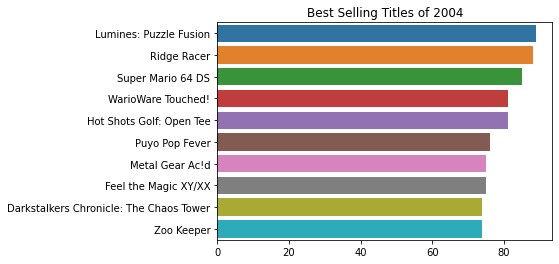

In [45]:
#plot the figure
sns.barplot(x = 'Review Score', y = 'Title', data = bestSelling2004.head(10), ci = False)
#set title
plt.title('Best Selling Titles of 2004')
#remove labels
plt.xlabel('')
plt.ylabel('')

plt.show()

## of 2005

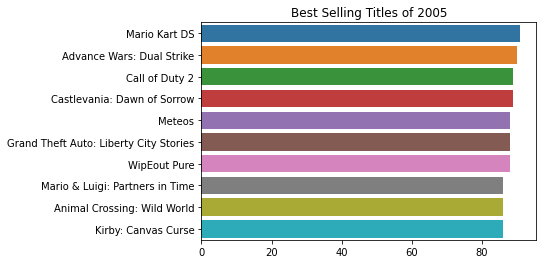

In [46]:
#plot the figure
sns.barplot(x = 'Review Score', y = 'Title', data =bestSelling2005.head(10), ci = False)
#set title
plt.title('Best Selling Titles of 2005')
#remove labels
plt.xlabel('')
plt.ylabel('')

plt.show()

## of 2006

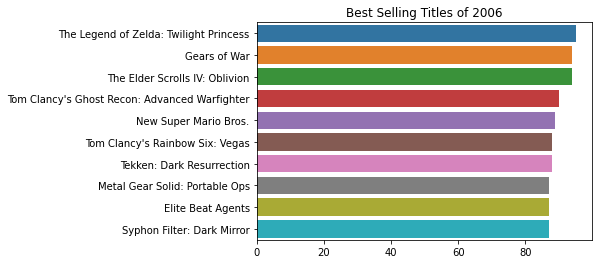

In [47]:
#plot the figure
sns.barplot(x = 'Review Score', y = 'Title', data =bestSelling2006.head(10), ci = False)
#set title
plt.title('Best Selling Titles of 2006')
#remove labels
plt.xlabel('')
plt.ylabel('')

plt.show()

## of 2007

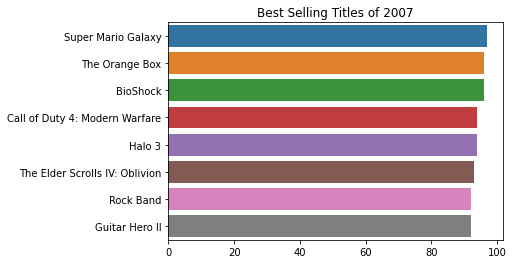

In [48]:
#plot the figure
sns.barplot(x = 'Review Score', y = 'Title', data =bestSelling2007.head(10), ci = False)
#set title
plt.title('Best Selling Titles of 2007')
#remove labels
plt.xlabel('')
plt.ylabel('')

plt.show()

## of 2008

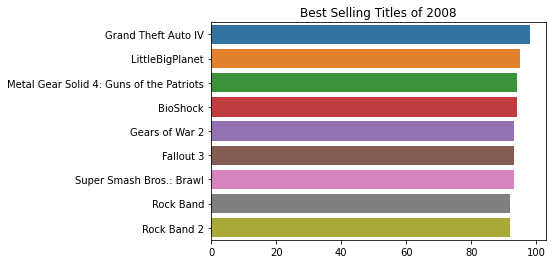

In [49]:
#plot the figure
sns.barplot(x = 'Review Score', y = 'Title', data =bestSelling2008.head(10), ci = False)
#set title
plt.title('Best Selling Titles of 2008')
#remove labels
plt.xlabel('')
plt.ylabel('')

plt.show()

## of all time

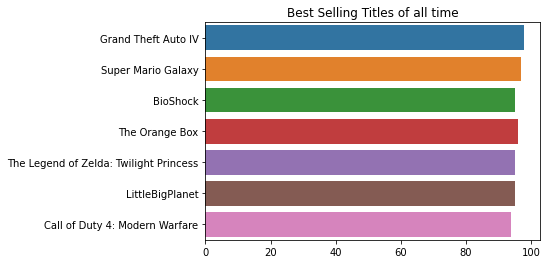

In [57]:
#plot the figure
sns.barplot(x = 'Review Score', y = 'Title', data = bestSellingAllTime.head(10), ci = False)
#set title
plt.title('Best Selling Titles of all time')
#remove labels
plt.xlabel('')
plt.ylabel('')

plt.show()